The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


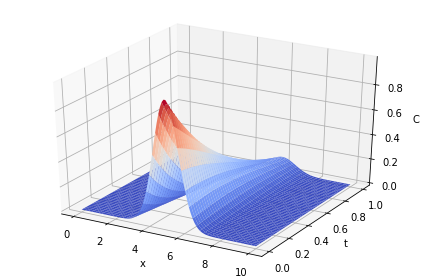

In [17]:
'''
Forward time central space method to solve 1D advection-diffusion-reaction equation
    C_t + u*C_x - E*C_xx + kd*C = 0, x0 < x < xL
    
Dirichlet boundary conditions C(x0,t) = C1, C(xL,t) = 0
Initial condition C(x,0) = \exp(-(x-L/2)^2)
'''

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt


M = 100 # number of x grid points
N = 200 # number of t grid points

x0 = 0
xL = 10

# ----- Discretization step -----
h = (xL - x0)/(M - 1)

t0 = 0
tF = 1

k = (tF - t0)/(N - 1)

# ----- Define coefficients
E  = 0.05  # Diffusion coefficient
kd = 2     # Reaction rate
u  = 0.5   # Flow velocity

r = u*k/(2*h) 
s = E*k/(h**2)
w = kd*k

x = np.linspace(x0, xL, M)
t = np.linspace(t0, tF, N)

# ----- Initial condition -----
C = np.zeros((M, N))
C1 = 0.0
C[:,0] = np.exp(-(x-xL/2)**2)
#C[:,0] = x

# ----- Dirichlet Boundary Conditions -----
C[0,:]  = C1    # left BC
C[-1,:] = 0.0   # Right BC

# ----- FTCS Scheme -----
for j in range(0, N-1):
    for i in range(1, M-1):
        C[i, j+1] = -(r-s)*C[i-1,j] + (1-2*s-w)*C[i,j] + (r+s)*C[i-1,j]
        
# ----- Prepare to Plot Surface
T, X = np.meshgrid(t, x)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, C, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('C')
plt.tight_layout()
plt.savefig('FTCS-init1.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


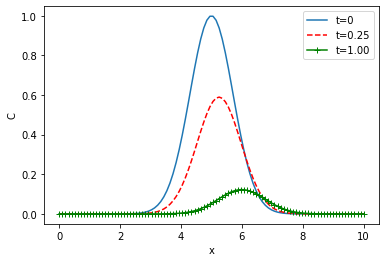

In [36]:
plt.plot(x,C[:,0])
plt.plot(x,C[:,50],'r--')
plt.plot(x,C[:,199],'g-+')
plt.legend(['t=0','t=0.25','t=1.00'])
plt.xlabel('x')
plt.ylabel('C')
plt.savefig('FTCS-init2.eps', format='eps')